In [6]:
%cd ..
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # use cpu because I'm training on gpu

from thumbs.experiments.pokemon_wgan_5stride_good_dataset import PokemonExperiment
from thumbs.train import load_weights
from thumbs.viz import show_samples, visualize_preprocessed_image
import tensorflow as  tf
import numpy as np



/home/anthony/workspace


In [7]:
exp = PokemonExperiment()
mparams = exp.get_mutable_params()
m = exp.get_model(mparams[0]).build()
load_weights(m.gan, exp.get_params().weight_path)

Model: "discriminator"
________________________________________________________________________________________________________________________________________________________________________________________________________
 Layer (type)                                                                             Output Shape                                                                    Param #                       
 conv2d_4 (Conv2D)                                                                        (None, 64, 64, 64)                                                              4864                          
                                                                                                                                                                                                        
 leaky_re_lu_7 (LeakyReLU)                                                                (None, 64, 64, 64)                                                              0  

# Make a fake pokemon and judge it

1/1 [==============================] - 0s 300ms/step


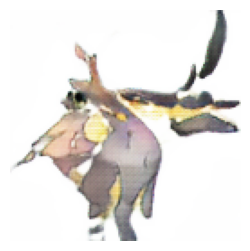

1/1 [==============================] - 0s 90ms/step
[[17.188412]]
24/25 [===========================>..] - ETA: 0s

In [8]:

noise = np.random.normal(0, 1, (1, 100))
generated_thumbnails = m.generator.predict(noise)
visualize_preprocessed_image(generated_thumbnails[0], (3,3))
print(m.discriminator.predict(generated_thumbnails))

# mean of a lot of generated images
noise = np.random.normal(0, 1, (800, 100))
generated_thumbnails = m.generator.predict(noise)
print(np.mean(m.discriminator.predict(generated_thumbnails)))

# Judge a real pokemon

Images in /home/anthony/workspace/yt-data/data/pokemon
['282-mega.jpg', '582.jpg', '340.jpg', '570.jpg', '136.jpg', '531-mega.jpg', '335.jpg', '96.jpg', '581.jpg', '153.jpg']
Found 819 total files
Found 819 jpgs


100%|██████████| 819/819 [00:00<00:00, 898.18it/s]


<Figure size 640x480 with 0 Axes>

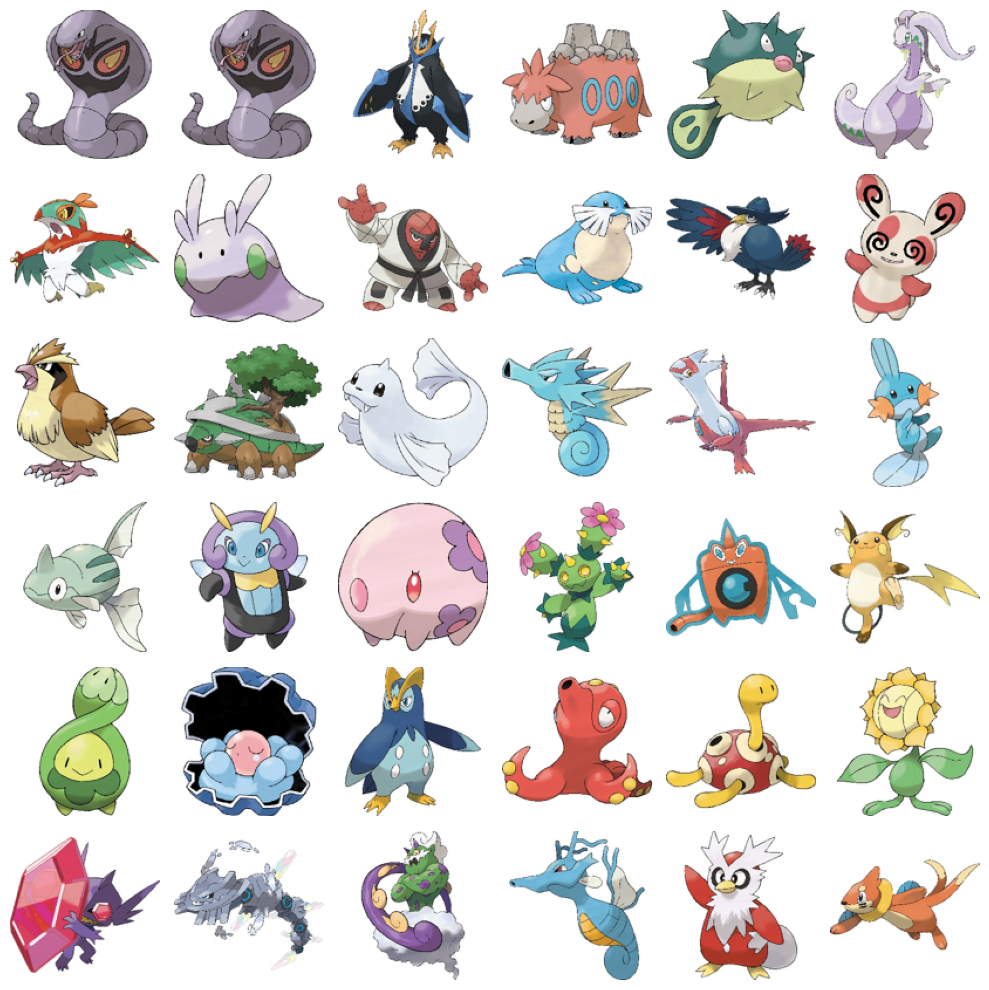

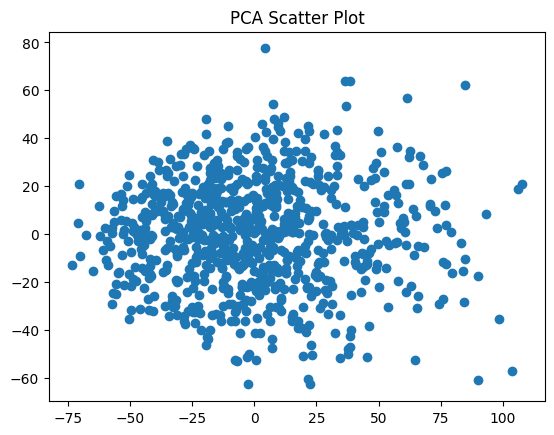

(819, 128, 128, 3)

In [ ]:
from thumbs.data import get_pokemon_data256
images = get_pokemon_data256()
images.shape

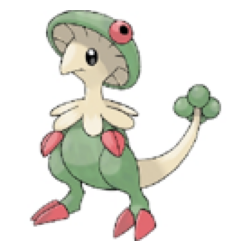

1/1 [==============================] - 0s 65ms/step
[[20.979847]]
26/26 [==============================] - 2s 61ms/step
41.8323


In [ ]:
real_pokemon = images[np.random.randint(0, images.shape[0], 1)]
visualize_preprocessed_image(real_pokemon[0], (3,3))

print(m.discriminator.predict(real_pokemon))


# Mean of the entire real set
print(np.mean(m.discriminator.predict(images)))